In [1]:
# https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

# 1-Importando Bibliotecas

In [2]:
import pandas                as pd
import seaborn               as sns
import numpy                 as np

from imblearn.over_sampling  import SMOTE
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.naive_bayes     import BernoulliNB
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import precision_score
from sklearn.metrics         import recall_score

%matplotlib inline
!pip install -U imbalanced-learn

# 2- Carregando o dataset

In [3]:
df = pd.read_csv('/Users/fernanda/Library/Mobile Documents/com~apple~CloudDocs/portfolio/Customer-Churn.csv')
dados = df.copy()

# 3- Conhecendo os dados 

A análise do conjunto de dados de rotatividade da Orange Telecom tem como objetivo identificar algumas variáveis para identificar potenciais clientes que darão churn.

# 4- Limpeza e tratamento dos dados

In [4]:
dados.head(3)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim


In [5]:
dados.dtypes

Maior65Anos                  int64
Conjuge                     object
Dependentes                 object
MesesDeContrato              int64
TelefoneFixo                object
VariasLinhasTelefonicas     object
ServicoDeInternet           object
SegurancaOnline             object
BackupOnline                object
SeguroNoDispositivo         object
SuporteTecnico              object
TVaCabo                     object
StreamingDeFilmes           object
TipoDeContrato              object
PagamentoOnline             object
FormaDePagamento            object
ContaMensal                float64
Churn                       object
dtype: object

In [6]:
#Tamanho do DF

print(f'Número de linhas: {dados.shape[0]}')
print(f'Número de colunas: {dados.shape[1]}')

Número de linhas: 7043
Número de colunas: 18


### Transformando colunas categóricas

In [7]:
#Transformando colunas categóricas em numéricas
traducao_dicionario = {'Sim' : 1,
                      'Nao': 0}
                      
dados_modificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dicionario)
dados_modificados

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1
...,...,...,...,...,...
7038,1,1,1,1,0
7039,1,1,1,1,0
7040,1,1,0,1,0
7041,1,0,1,1,1


In [8]:
#Excluido colunas e transformando em numéricas pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

#concatenando dados transformados
dados_final = pd.concat([dados_modificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [9]:
#Expandindo a exibição de saída para ver mais colunas do df
pd.set_option('display.max_columns', 39)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


### Balanceando dados da coluna Alvo(y)

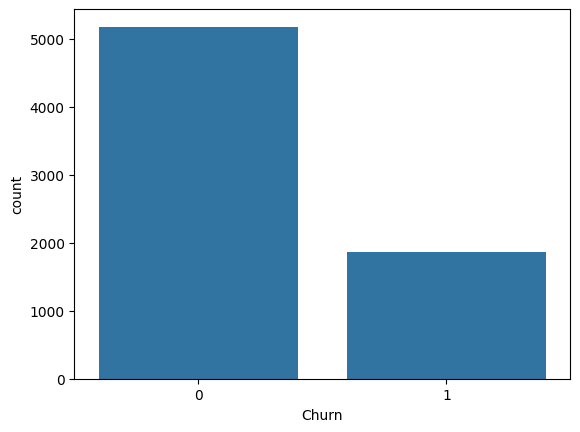

In [10]:
#Verificando o balanceamento da variável (y) 
ax = sns.countplot(x='Churn', data=dados_final)

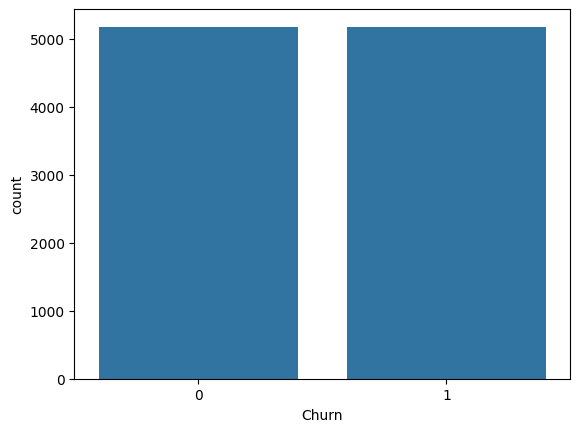

In [11]:
#Realizando o baleanceamento de dados _ Oversampling (SMOTE)

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

# Concatena a variável churn (y) com as features (X)
dados_final = pd.concat([X, y], axis=1)  

# Plotando a variável churn balanceada.
ax = sns.countplot(x='Churn', data=dados_final)  

# Preparando os dados para o modelo 

### Divisão x e y

In [12]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

### Normalizando os dados 

In [13]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ]])

# Modelo KNN

### Implementando o modelo KNN

#### Dividindo os dados em treino e teste

In [14]:
from sklearn.model_selection import train_test_split

#Criando dataset de treino e teste (70% para treino e 30% para teste)
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size= 0.3, random_state=123)

#### Treino e teste do modelo

In [15]:
from sklearn.neighbors import KNeighborsClassifier

#Criando o Modelo(por padrão 5 vizinhos)>>(para calcular a distancia dos vizinhos > métrica Euclidiana)
knn = KNeighborsClassifier(metric='euclidean')

#Treinando o modelo com os dados de treino 
knn.fit(X_train, y_train)

#Testando o modelo com dados de teste
predito_knn = knn.predict(X_test)

#### Validando o modelo

In [30]:
#Matriz de confusão 
from sklearn.metrics import confusion_matrix
print(f'A Matriz de confusão do modelo foi: {confusion_matrix(y_test, predito_knn)}.')

# Métrica - Acurácia (O quanto o modelo acerto)
from sklearn.metrics import accuracy_score
print(f'A acurácia do modelo foi: {accuracy_score(y_test, predito_knn).round(4)}')

#Métrica - Precisão (Quantos valores positivos(da Matriz de confusão) foram classificados de forma correta)
from sklearn.metrics import precision_score
print(f'A Precisão do modelo foi: {precision_score(y_test, predito_knn).round(4)}.')

#Métrica - Recall (Quantos verdadeiros positivos(da Matriz de confusão) que o modelo acertou) )
from sklearn.metrics import recall_score
print(f'O Recall do modelo foi: {recall_score(y_test, predito_knn).round(4)}.')

A Matriz de confusão do modelo foi: [[1240  329]
 [ 247 1289]].
A acurácia do modelo foi: 0.8145
A Precisão do modelo foi: 0.7967.
O Recall do modelo foi: 0.8392.


# Modelo Bernoulli Naïve Bayes

####   Dividindo os dados em treino e teste

In [17]:
from sklearn.model_selection import train_test_split

#Criando dataset de treino e teste (70% para treino e 30% para teste)
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size= 0.3, random_state=123)

#### Treino e teste do modelo

In [18]:
from sklearn.naive_bayes import BernoulliNB

#Como nem todas as variáveis são binárias. Aplicaremos o binarize para transformar a variável em binaária ou não, usando a mediana. 

#valor central <calculo binarize> (valor ideal para dividir os dados)
np.median(X_train)
print(f'Em dados com valores acima de {np.median(X_train).round(3)} será classificado como 1 e abaixo em 0, transformando assim as variáveis em binárias.')

Em dados com valores acima de -0.446 será classificado como 1 e abaixo em 0, transformando assim as variáveis em binárias.


In [19]:
#criando o modelo
bnb = BernoulliNB(binarize=0.44)

In [20]:
X_train

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ]])

In [21]:
y_train

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [22]:
#treinar o modelo
bnb.fit(X_train, y_train)

BernoulliNB(binarize=0.44)

In [23]:
#testar o modelo
predito_BNb = bnb.predict(X_test)
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])

#### Validando o modelo 

In [32]:
#Matriz de confusão 
from sklearn.metrics import confusion_matrix
print(f'A Matriz de confusão do modelo foi: {confusion_matrix(y_test, predito_BNb)}.')

#Acurácia
from sklearn.metrics import accuracy_score
print(f'A acurácia do modelo foi: {accuracy_score(y_test, predito_BNb).round(4)}')

#Precisão 
from sklearn.metrics import precision_score
print(f'A Precisão do modelo foi: {precision_score(y_test, predito_BNb).round(4)}.')

#Recall
from sklearn.metrics import recall_score
print(f'O Recall do modelo foi: {recall_score(y_test, predito_BNb).round(4)}.')

A Matriz de confusão do modelo foi: [[1084  485]
 [ 238 1298]].
A acurácia do modelo foi: 0.7671
A Precisão do modelo foi: 0.728.
O Recall do modelo foi: 0.8451.


# Modelo Árvore de decisão



In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
#Criando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [35]:
#Treinando o modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [36]:
#testando o modelo
predito_ArvoreDecisao = dtc.predict(X_test)
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

#### Validando o modelo 

In [37]:
#Matriz de confusão 
from sklearn.metrics import confusion_matrix
print(f'A Matriz de confusão do modelo foi: {confusion_matrix(y_test, predito_ArvoreDecisao).round(4)}.')

#Acurácia
from sklearn.metrics import accuracy_score
print(f'A acurácia do modelo foi: {accuracy_score(y_test, predito_ArvoreDecisao).round(4)}')

#Precisão 
from sklearn.metrics import precision_score
print(f'A Precisão do modelo foi: {precision_score(y_test, predito_ArvoreDecisao).round(4)}.')

#Recall
from sklearn.metrics import recall_score
print(f'O Recall do modelo foi: {recall_score(y_test, predito_ArvoreDecisao).round(4)}.') 

A Matriz de confusão do modelo foi: [[1256  313]
 [ 279 1257]].
A acurácia do modelo foi: 0.8093
A Precisão do modelo foi: 0.8006.
O Recall do modelo foi: 0.8184.
